# 凸最適化

凸最適化は色んな所で出てきます。
ここでは双対変換まで学んでみましょう。


参考

* [Convex Optimization](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)

## 集合の内包

* Affine集合：$x_1, x_2\in C$について、$\theta x_1+(1-\theta) x_2 \in C$のとき、$C$はAffine集合
* Affine hull：$\mathrm{aff }\; C=\{\theta_1 x_1 +\dots+ \theta_k x_k | x_1, \dots, x_k \in C, \theta_1 +\dots +\theta_k = 1 \}$
* Affine 次元：Affine hullの次元
* Relative interior：$\mathrm{reint }\; C=\{x \in C \mid B(x, r) \cap \operatorname{aff} C \subseteq C$ for some $r>0\}$
    * ここで、$B(x, r)=\{y \mid\|y-x\| \leq r\}$
    * これは例えば3次元空間での2次元平面を扱うときに便利です。
* 集合$C$の触点：$c\in \mathbb{R}^N$が$C$の触点であるとは、$C$の点列$(c_n)_{n\in \mathbb{N}}$で$\lim _{n \rightarrow \infty} c_n=c$を満たすものが存在すること。
    * 例えば$0$は$(0, 1)$の触点ですが、$1.1$は違います。
* 集合の閉包$\mathrm{cl}(C)$：集合の触点全体の集合。$C$の全ての点は触点なので、常に$C \in \mathrm{cl} (C)$。
    * 例えば$\mathrm{Cl}((0,1))=[0,1], \mathrm{Cl}([0,1))=[0,1], \mathrm{Cl}([0,1])=[0,1]$
    * 参考：https://math-fun.net/20210816/17403/
* Relative boundary：$\mathrm{cl}\; C \setminus \mathrm{reint}\; C$

例えば、3次元空間上の長方形
$$
C=\left\{x \in \mathbf{R}^3 \mid-1 \leq x_1 \leq 1,-1 \leq x_2 \leq 1, x_3=0\right\}
$$

を考えてみましょう。

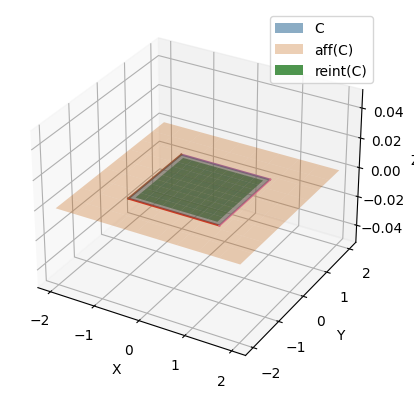

In [36]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# 集合Cの描画
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
z = [0]
X, Y = np.meshgrid(x, y)
Z = np.array([z] * Y.shape[0])

surf = ax.plot_surface(X, Y, Z, alpha=0.5, label="C")  # 集合C
surf._edgecolors2d = surf._edgecolor3d
surf._facecolors2d = surf._facecolor3d

# Affine setの描画(一部)
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
z = [0]
X, Y = np.meshgrid(x, y)
Z = np.array([z] * Y.shape[0])

surf = ax.plot_surface(X, Y, Z, alpha=0.3, label="aff(C)")  # affine set
surf._edgecolors2d = surf._edgecolor3d
surf._facecolors2d = surf._facecolor3d

# reint(C)
x = np.linspace(-0.9, 0.9, 10)
y = np.linspace(-0.9, 0.9, 10)
z = [0]
X, Y = np.meshgrid(x, y)
Z = np.array([z] * Y.shape[0])

surf = ax.plot_surface(X, Y, Z, alpha=0.8, label="reint(C)")  # relative interior
surf._edgecolors2d = surf._edgecolor3d
surf._facecolors2d = surf._facecolor3d


# boundary(C)

x = np.linspace(-1, 1, 10)
y = [-1] * 10
ax.plot(x, y, zs=0)
x = np.linspace(-1, 1, 10)
y = [1] * 10
ax.plot(x, y, zs=0)
y = np.linspace(-1, 1, 10)
x = [-1] * 10
ax.plot(x, y, zs=0)
y = np.linspace(-1, 1, 10)
x = [1] * 10
ax.plot(x, y, zs=0)

ax.legend()

plt.show()

# 凸集合

* 凸集合：任意の$x_1, x_2 \in C$と任意の$0 \leq \theta \leq 1$について、$\theta x_1 + (1-\theta)x_2\in C$のとき凸集合と呼ぶ。
* 